<a href="https://colab.research.google.com/github/AdityaRadjou/Brain-Tumor-Detection/blob/main/BrainTumorDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import os
import tqdm
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
import tensorflow as tf
from sklearn.metrics import accuracy_score

In [3]:
root_dir = "./drive/MyDrive/data"

classes = {'notumor': 0, 'glioma': 1,'meningioma': 2, 'pituitary': 3}

images = [] #will contain all images
targets = [] #will contains the target of the images

def get_data_by_class(c):
  class_dir = os.path.join(root_dir,c)
  images = []
  for i in os.listdir(class_dir):
    img = cv2.imread(os.path.join(class_dir,i),cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img,(128,128))
    images.append(img)
  return np.array(images)

data = []
for c in classes:
  data.append(get_data_by_class(c))

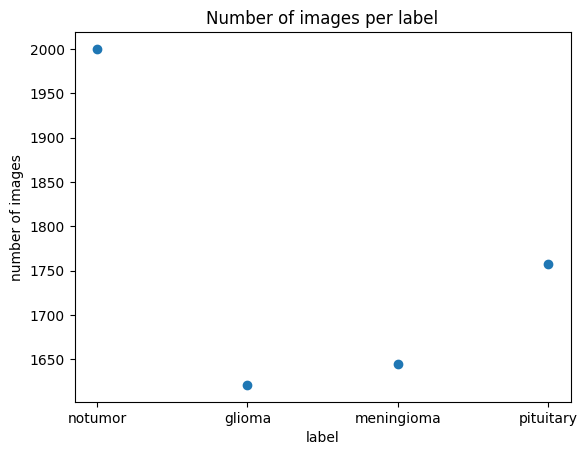

In [4]:
labels = [c for c in classes]
sizes = [len(data[i]) for i in range(4)]

plt.scatter(labels,sizes)
plt.title("Number of images per label")
plt.xlabel("label")
plt.ylabel("number of images")
plt.show()

In [5]:
n = min(sizes)

images, targets = [],[]
for c in classes:
  images.extend(shuffle(data[classes[c]],n_samples=n))
  targets.extend([classes[c]]*n)

shuffle_indices = np.random.permutation(range(len(images)))
images = np.array(images)[shuffle_indices]
targets = np.array(targets)[shuffle_indices]

images = images/255

In [6]:
Xtrain, Xtest, ytrain, ytest = train_test_split(images,targets,test_size=0.2)

In [7]:
ytrain = tf.keras.utils.to_categorical(ytrain)
ytest = tf.keras.utils.to_categorical(ytest)

In [8]:
CNN = Sequential()
CNN.add(Conv2D(16,(3,3),activation="relu",input_shape=(128,128,1)))
CNN.add(Conv2D(32,(3,3),activation="relu"))
CNN.add(MaxPooling2D())
CNN.add(Conv2D(64,(3,3),activation="relu"))
CNN.add(MaxPooling2D())
CNN.add(Conv2D(128,(3,3),activation="relu"))
CNN.add(MaxPooling2D())
CNN.add(Dropout(0.25))
CNN.add(Flatten())
CNN.add(Dense(64,activation="relu"))
CNN.add(Dropout(0.25))
CNN.add(Dense(4,activation="sigmoid"))

In [9]:
CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      160       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 128)       7

In [10]:
CNN.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [11]:
training = CNN.fit(Xtrain,ytrain,epochs=50,validation_split=0.1)

Epoch 1/50
146/146 [==============================] - 19s 39ms/step - loss: 0.8178 - accuracy: 0.6592 - val_loss: 0.5529 - val_accuracy: 0.8015
Epoch 2/50
146/146 [==============================] - 4s 30ms/step - loss: 0.4339 - accuracy: 0.8318 - val_loss: 0.4223 - val_accuracy: 0.8420
Epoch 3/50
146/146 [==============================] - 4s 30ms/step - loss: 0.3338 - accuracy: 0.8700 - val_loss: 0.3831 - val_accuracy: 0.8709
Epoch 4/50
146/146 [==============================] - 4s 31ms/step - loss: 0.2648 - accuracy: 0.8976 - val_loss: 0.3678 - val_accuracy: 0.9017
Epoch 5/50
146/146 [==============================] - 4s 30ms/step - loss: 0.1917 - accuracy: 0.9287 - val_loss: 0.3148 - val_accuracy: 0.8902
Epoch 6/50
146/146 [==============================] - 5s 31ms/step - loss: 0.1433 - accuracy: 0.9432 - val_loss: 0.3573 - val_accuracy: 0.9114
Epoch 7/50
146/146 [==============================] - 4s 31ms/step - loss: 0.1245 - accuracy: 0.9539 - val_loss: 0.3466 - val_accuracy: 0.917